In [2]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# (further reading on mpl imports: http://bit.ly/197aGoq )

In [7]:
t1 = pd.Series([2,4,6,np.nan,10,12,14,16])
t1

0     2.0
1     4.0
2     6.0
3     NaN
4    10.0
5    12.0
6    14.0
7    16.0
dtype: float64

In [8]:
# by default (without specifying them explicitly), the index label is just an int
t1[3]

nan

In [5]:
# create a couple more Series
t2, t3 = pd.Series(np.random.randn(8)), pd.Series(np.random.randn(8))

In [9]:
# combine multiple Series into a DataFrame with column labels
eg_1 = pd.DataFrame({'X': t1, 'Y': t2, 'Z': t3})

eg_1

,X,Y,Z
0,2.0,-1.012659,-0.648304
1,4.0,-0.400216,-0.622292
2,6.0,-0.791475,-0.664842
3,NaN,1.224307,0.933532
4,10.0,-1.342880,0.133911
5,12.0,0.122807,-1.279913
6,14.0,0.131334,-0.651467
7,16.0,-1.129968,0.153958


In [11]:
# when Series are different lengths, DataFrame fills in gaps with NaN
t4 = pd.Series(np.random.randn(9))  # whoaaaaaa this Series has extra entries!

eg1 = pd.DataFrame({'Q': t1, 'R': t2, 'S': t3, 'T': t4})

eg1 

,Q,R,S,T
0,2.0,-1.012659,-0.648304,-0.122341
1,4.0,-0.400216,-0.622292,-0.545047
2,6.0,-0.791475,-0.664842,-0.525452
3,NaN,1.224307,0.933532,-0.287622
4,10.0,-1.342880,0.133911,-0.530484
5,12.0,0.122807,-1.279913,-0.307490
6,14.0,0.131334,-0.651467,0.389719
7,16.0,-1.129968,0.153958,-1.173095
8,NaN,NaN,NaN,-0.406870


In [25]:
# create a DataFrame from numpy array
eg2 = pd.DataFrame(np.random.randn(5,3))

eg2             # can only have one 'pretty' output per cell (if it's the last command)

#print df2       # otherwise, can print arb number of results w/o pretty format
#print df1       # (uncomment both of these print statements)

,0,1,2
0,-0.620832,1.218000,2.295139
1,-0.344716,0.374799,1.141888
2,0.612767,-0.832395,1.020618
3,-0.667393,1.244397,1.409566
4,-0.723974,1.027837,0.102888


In [26]:
# recall current dataframe 
eg2.head(3)

,0,1,2
0,-0.620832,1.218000,2.295139
1,-0.344716,0.374799,1.141888
2,0.612767,-0.832395,1.020618


In [30]:
cola = ['e', 'f', 'g']
# assign columns attribute (names) 
eg2.columns = cola
# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dts = pd.date_range(start='2018-01-30 20:45:27', freq='W', periods=5)
eg2.index = dts


eg2



,e,f,g
2018-02-04 20:45:27,-0.620832,1.218000,2.295139
2018-02-11 20:45:27,-0.344716,0.374799,1.141888
2018-02-18 20:45:27,0.612767,-0.832395,1.020618
2018-02-25 20:45:27,-0.667393,1.244397,1.409566
2018-03-04 20:45:27,-0.723974,1.027837,0.102888


In [32]:
# an aside: inspecting the dates object...
print 'what is a date_range object?\n\n', dts

what is a date_range object?

DatetimeIndex(['2018-02-04 20:45:27', '2018-02-11 20:45:27',
               '2018-02-18 20:45:27', '2018-02-25 20:45:27',
               '2018-03-04 20:45:27'],
              dtype='datetime64[ns]', freq='W-SUN')


In [33]:
# select a row by index label by using .loc 
eg2.loc['2018-02-04 20:45:27']

e   -0.620832
f    1.218000
g    2.295139
Name: 2018-02-04 20:45:27, dtype: float64

In [34]:
# select a single element
eg2.loc['2018-02-18 20:45:27','g']

1.020617812611923

In [37]:
# new dataframe with random numbers
eg2 = pd.DataFrame(np.random.randn(5,3), index=list('ghijk'),columns=list('EFG'))

eg2

,E,F,G
g,0.880428,-2.074026,-0.204090
h,-0.344060,-0.083839,1.229392
i,0.429915,-0.127239,-1.125389
j,-1.187934,-0.574244,0.437646
k,0.570099,0.876939,-0.406821


In [43]:
# address two separate rows, and a range of three columns
eg2.loc[['g','k'],'E':'G']

,E,F,G
g,0.880428,-2.074026,-0.204090
k,0.570099,0.876939,-0.406821


In [54]:
gnacs_y = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_y.split('|')

In [56]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
pt1 = pd.read_csv('./twitter_sample.csv', sep='|', names=colnames)

pt1.tail(7)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [57]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
print pt1.columns
print pt1.drop( [u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13'],axis=1).columns


Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOffset',
       u'None.5', u'None.6', u'None.7', u'None.8', u'None.9', u'None.10',
       u'None.11', u'None.12', u'None.13', u'actor:displayName',
       u'actor:preferredUsername', u'actor:id', u'gnip:klout_score',
       u'actor:followersCount', u'actor:friendsCount', u'actor:listedCount',
       u'actor:statusesCount', u'Tweet', u'None.14', u'None.15', u'None.16'],
      dtype='object')
Index([u'id', u'postedTime', u'body', u'None',
       u'['twitter_entiteis:urls:url']', u'['None']',
       u'['actor:languages_list-items']', u'gnip:language:value',
       u'twitter_lang', u'[u'geo:coordinates_list-items']', u'geo:type',
       u'None.1', u'None.2', u'None.3', u'None.4', u'actor:utcOf

In [58]:
# have a peek
pt1.tail(5)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [59]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
pt1[pt1.twitter_lang == 'en'].head()

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
#df1[df1["gnip:language:value"] == 'en'].head()  

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
11,"tag:search.twitter.com,2005:351835318024028161",2013-07-01T22:50:51.000Z,~FINALLY OFF OF WORK~,None,None,None,['en'],en,en,"[32.86107, -83.72062]",Point,"['[-83.739741, 32.765651]', '[-83.739741, 32.8...",Polygon,"Macon, GA",US,None,None,None,None,None,None,None,None,None,None,Tomeisha Cross,MISSMEISHA223,242505369,18,290,683,0,540,Tweet,None,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64,40543,116,486,60465,Tweet,None,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [60]:
# create new dataframe from numerical columns
pt2 = pt1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

pt2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0


In [61]:
# because I happen to know the answer, let's check data types of the columns...
pt2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [62]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatconv(valu):
    if valu == None or valu == 'None':
        return 0.0
    else:
        return float(valu)

In [63]:
# assigning to an existing column overwrites that column 
pt2['gnip:klout_score'] = pt2['gnip:klout_score'].map(floatconv)

# check again
pt2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [64]:
# use all floats just for fun. 
#  this only works if the elements can all be converted to floats (e.g. ints or something python can handle) 
pt2 = pt2.astype(float)

pt2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [65]:
# look at some activity ratios - add col to df
pt2['fol/fr'] = pt2['gnip:klout_score'] / pt2['actor:followersCount']

pt2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#df2.describe()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol/fr
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222
2,18.0,37.0,54.0,0.0,0.486486
3,50.0,438.0,174.0,1.0,0.114155
4,21.0,12.0,6.0,0.0,1.750000


In [66]:
# back to bigger df, without 'None' cols
pt1.head()

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,['http://twitter.com/ElkaAlb/status/3518353177...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [67]:
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
pop_pt = pt1[pt1["actor:followersCount"] >= 99]

# fix the klout scores again
#pop_df['gnip:klout_score'] = pop_df['gnip:klout_score'].map(floatify)

# in case you need to remind yourself of the dataframe
#pop_df.head()

# use GroupBy methods for stats on each group:
#pop_df.groupby("twitter_lang").size()      # number of elements per group
#pop_df.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 
#pop_df.groupby("twitter_lang").mean()      # algebraic mean of elements per group

In [68]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
lang_eng = pop_pt[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
lang_eng.head(2)  

# see that they type is DataFrameGroupBy object
#lang_gb

,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,tr,35,178,129,2028
1,es,32,144,215,4071
3,es,50,438,174,17636
5,tr,41,226,346,7759
6,pt,42,247,64,2438
8,en,38,380,860,3116
9,en,41,160,135,4170
16,und,53,1179,628,20141
18,he,37,151,284,641
20,it,46,1999,293,60236


In [69]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
lang_eng_mean = lang_eng.aggregate(np.mean)  

lang_eng_mean.head()

# verify the single index
#lang_gb_mean.index

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
ar,458.000000,413.000000,1061.000000
en,1796.147059,582.735294,16364.352941
es,1359.285714,441.142857,8953.357143
fr,116.000000,122.000000,3174.000000
he,151.000000,284.000000,641.000000


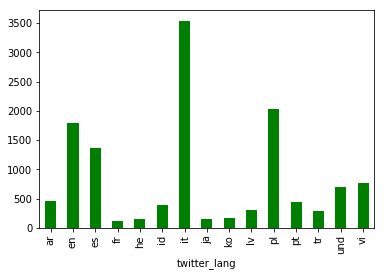

In [70]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lang_eng_mean['actor:followersCount'].plot(kind='bar', color='g')

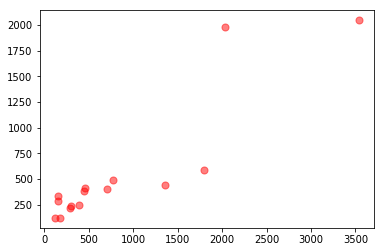

In [71]:
# more base matplotlib 
plt.scatter(x=lang_eng_mean['actor:followersCount'],\
            y=lang_eng_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='red',\
            marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35268cb2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f35266943d0>]], dtype=object)

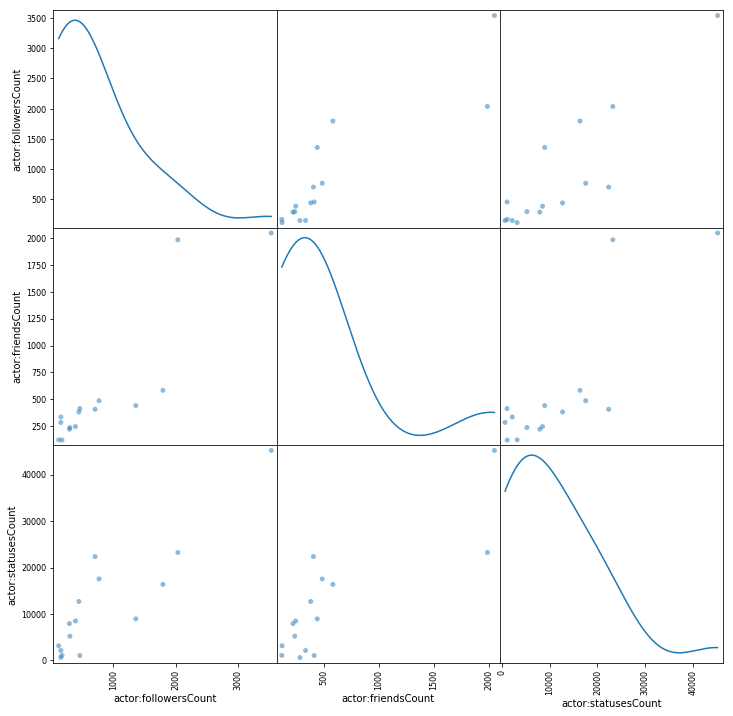

In [72]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(lang_eng_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)


In [73]:
# make up some data with large-scale patterns and a datetime index
pt = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
pt = pt.cumsum()
pt.head()

,A,B,C,D
2000-01-01,-1.292202,-1.469541,-0.747620,-0.334158
2000-01-02,-0.893381,-0.472227,-0.767495,-0.471829
2000-01-03,-1.445774,-0.048146,0.767423,0.302938
2000-01-04,-1.173912,-0.002495,0.637841,-0.088862
2000-01-05,0.418571,0.904756,0.321556,-0.095768


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f351e330910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f351e279710>]], dtype=object)

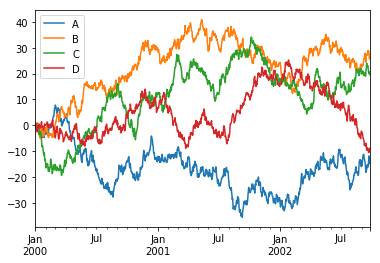

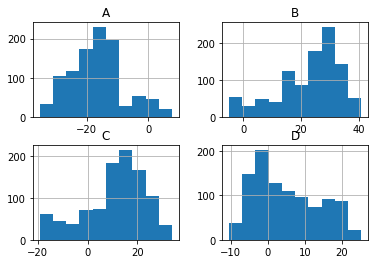

In [74]:
pt.plot()
pt.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f351df64690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f351df08890>]], dtype=object)

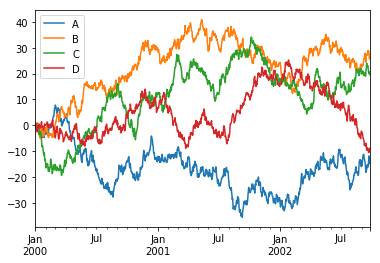

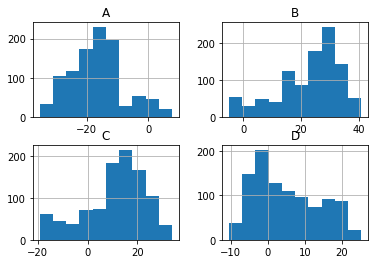

In [75]:
import prettyplotlib

pt.plot()
pt.hist()

In [77]:
%matplotlib inline

In [78]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [79]:
import seaborn as sns
sns.set(color_codes=True)

In [80]:
np.random.seed(sum(map(ord, "distributions")))

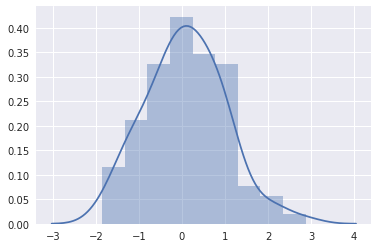

In [81]:
y = np.random.normal(size=99)
sns.distplot(y);

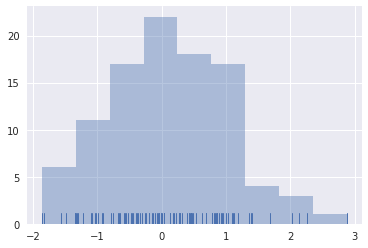

In [82]:
sns.distplot(y, kde=False, rug=True);

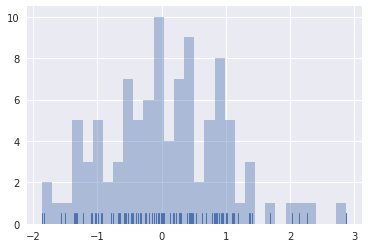

In [83]:
sns.distplot(y, bins=30, kde=False, rug=True);

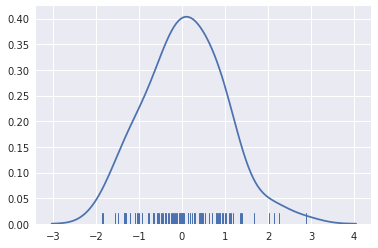

In [84]:
sns.distplot(y, hist=False, rug=True);

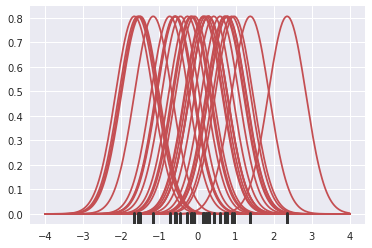

In [85]:
y = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * y.std() * y.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)
kernels = []
for y_i in y:

    kernel = stats.norm(y_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(y, color=".2", linewidth=3);

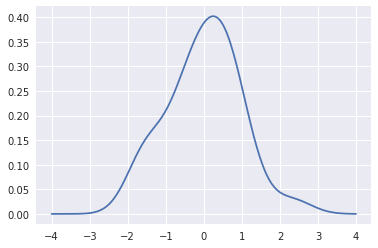

In [86]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

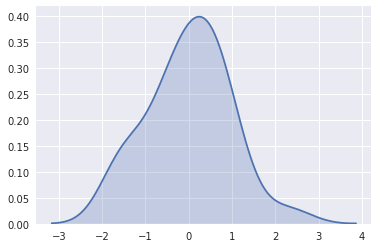

In [87]:
sns.kdeplot(y, shade=True);

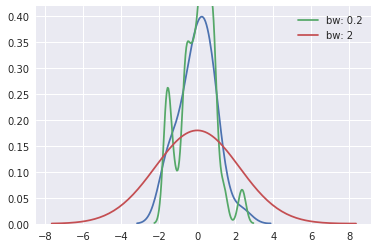

In [88]:
sns.kdeplot(y)
sns.kdeplot(y, bw=.2, label="bw: 0.2")
sns.kdeplot(y, bw=2, label="bw: 2")
plt.legend();

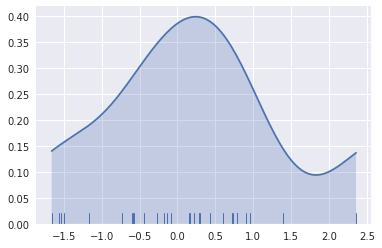

In [89]:
sns.kdeplot(y, shade=True, cut=0)
sns.rugplot(y);

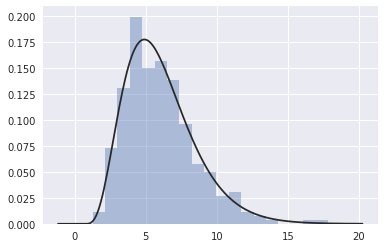

In [90]:
y = np.random.gamma(6, size=300)
sns.distplot(y, kde=False, fit=stats.gamma);

In [92]:
mean, cov = [1, 2], [(2, -1), (-1, 2)]
data = np.random.multivariate_normal(mean, cov, 200)
pt = pd.DataFrame(data, columns=["x", "y"])

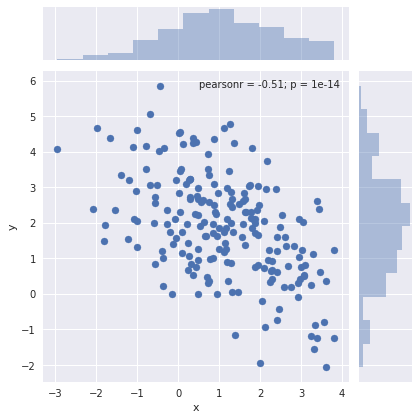

In [94]:
sns.jointplot(x="x", y="y", data=pt);

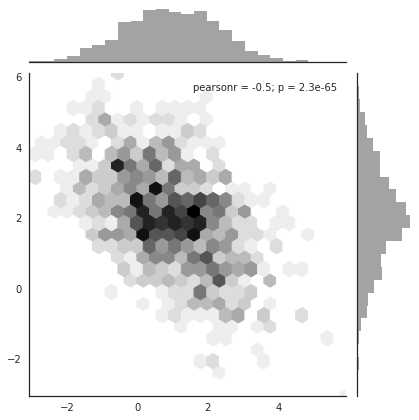

In [96]:
x, y = np.random.multivariate_normal(mean, cov, 999).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

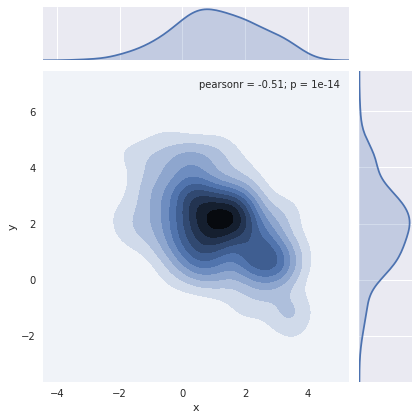

In [97]:
sns.jointplot(x="x", y="y", data=pt, kind="kde");

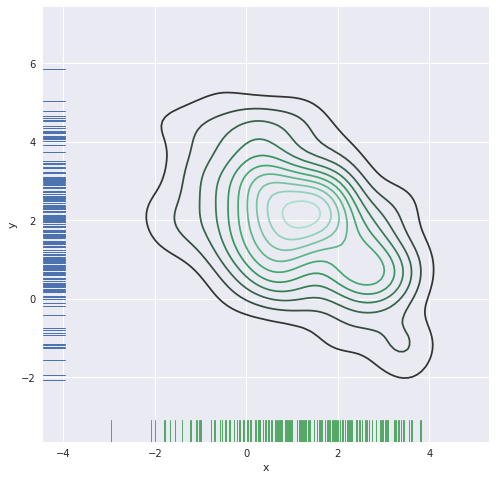

In [99]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot(pt.x, pt.y, ax=ax)
sns.rugplot(pt.x, color="g", ax=ax)
sns.rugplot(pt.y, vertical=True, ax=ax);

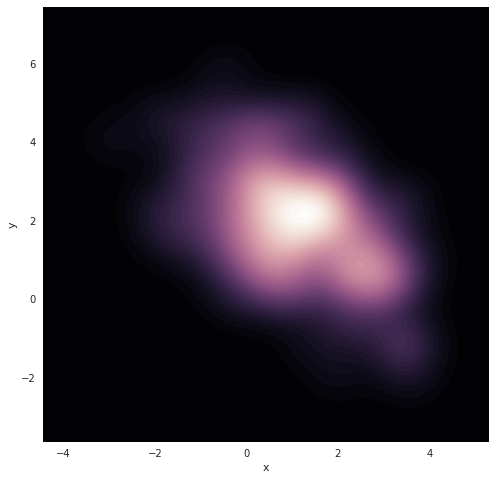

In [100]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(pt.x, pt.y, cmap=cmap, n_levels=70, shade=True);

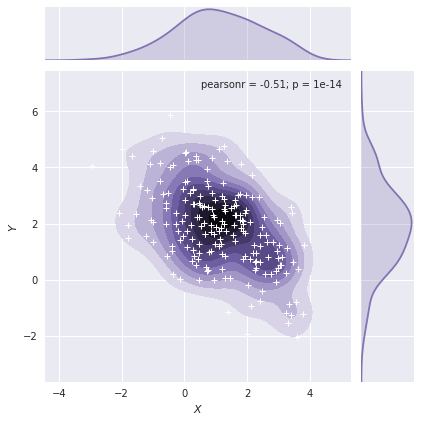

In [102]:
h = sns.jointplot(x="x", y="y", data=pt, kind="kde", color="m")
h.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
h.ax_joint.collections[0].set_alpha(0)
h.set_axis_labels("$X$", "$Y$");

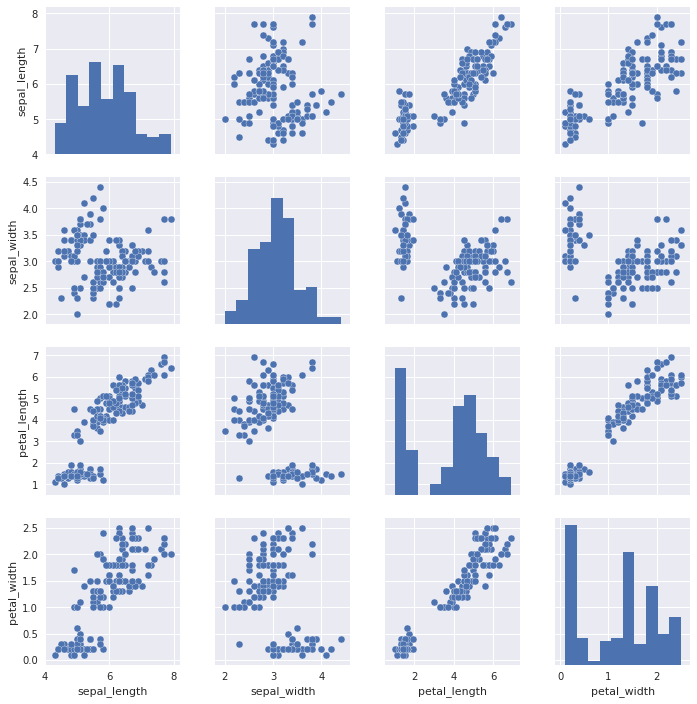

In [103]:
alexa = sns.load_dataset("iris")
sns.pairplot(alexa);

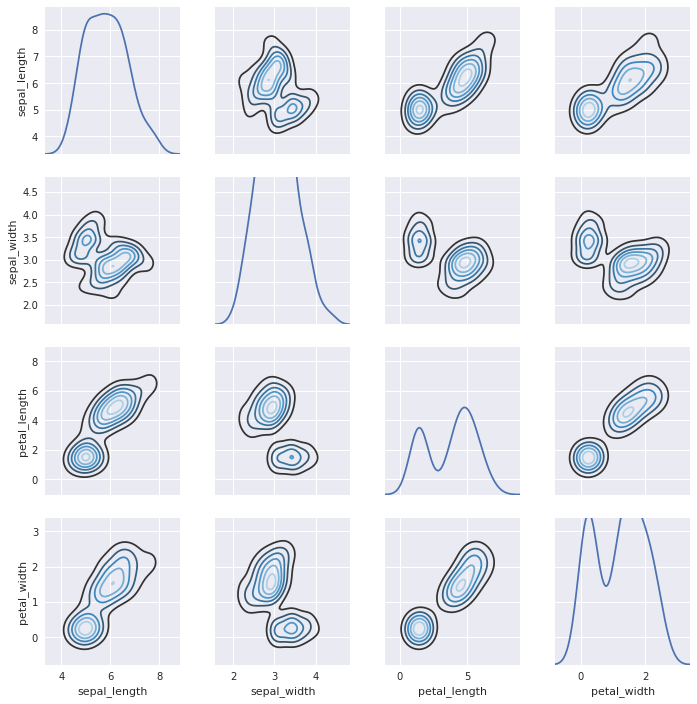

In [106]:
h = sns.PairGrid(alexa)
h.map_diag(sns.kdeplot)
h.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [107]:
%matplotlib inline

In [108]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [110]:
import seaborn as sns
sns.set(color_codes=True)

In [111]:
np.random.seed(sum(map(ord, "regression")))

In [112]:
cash = sns.load_dataset("tips")

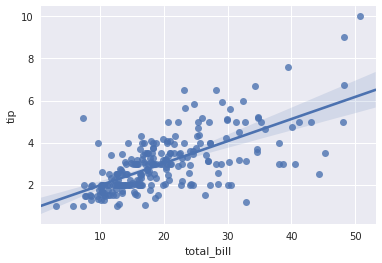

In [113]:
sns.regplot(x="total_bill", y="tip", data=cash);

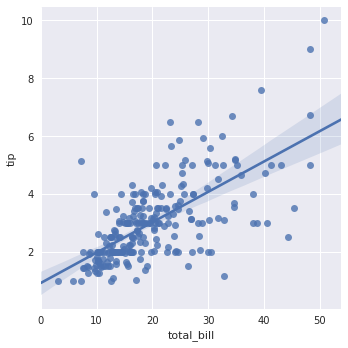

In [114]:
sns.lmplot(x="total_bill", y="tip", data=cash);

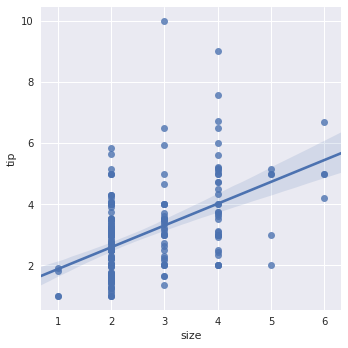

In [115]:
sns.lmplot(x="size", y="tip", data=cash);

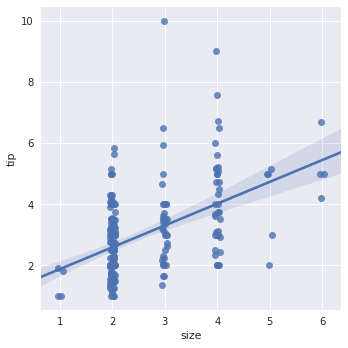

In [116]:
sns.lmplot(x="size", y="tip", data=cash, x_jitter=.05);

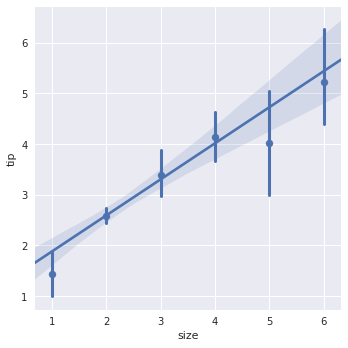

In [117]:
sns.lmplot(x="size", y="tip", data=cash, x_estimator=np.mean);

In [118]:
anscombe = sns.load_dataset("anscombe")

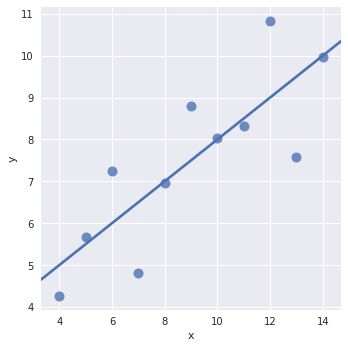

In [119]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 100});

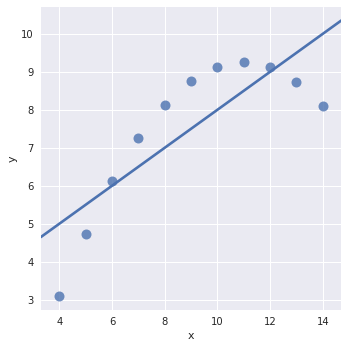

In [120]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 100});

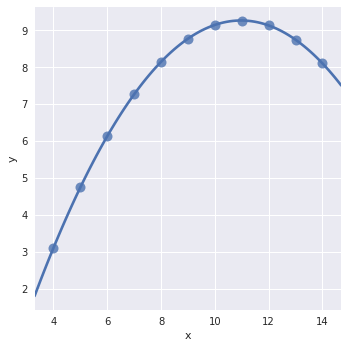

In [121]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 100});

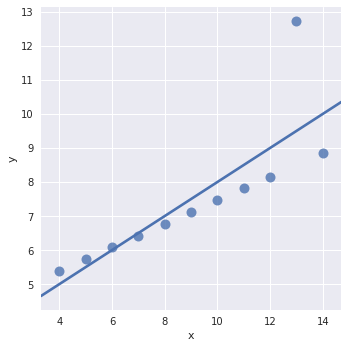

In [122]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 100});

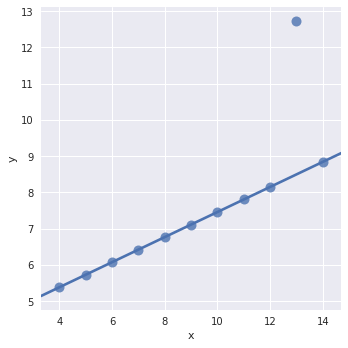

In [123]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 100});

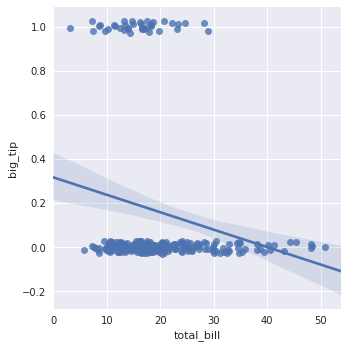

In [124]:
cash["big_tip"] = (cash.tip / cash.total_bill) > .20
sns.lmplot(x="total_bill", y="big_tip", data=cash,
           y_jitter=.03);

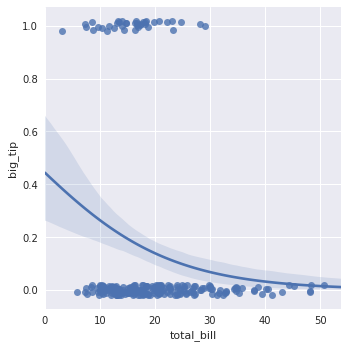

In [126]:
sns.lmplot(x="total_bill", y="big_tip", data=cash,
           logistic=True, y_jitter=.02);

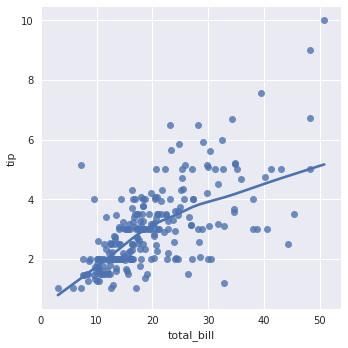

In [127]:
sns.lmplot(x="total_bill", y="tip", data=cash,
           lowess=True);

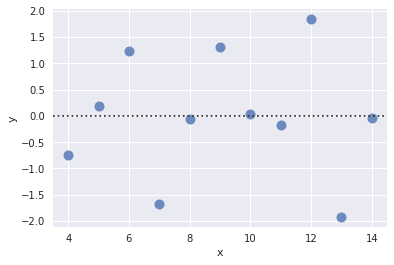

In [128]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 100});

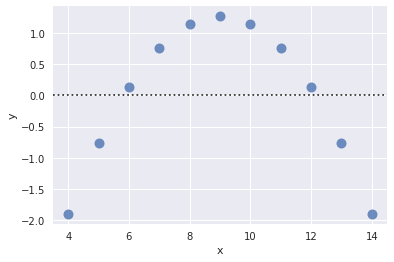

In [129]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 100});

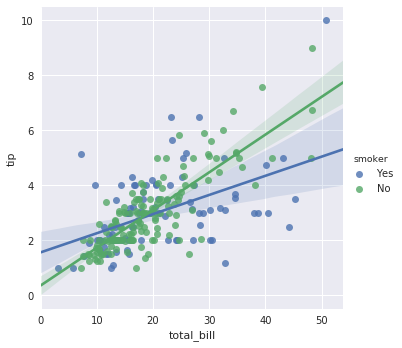

In [130]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=cash);

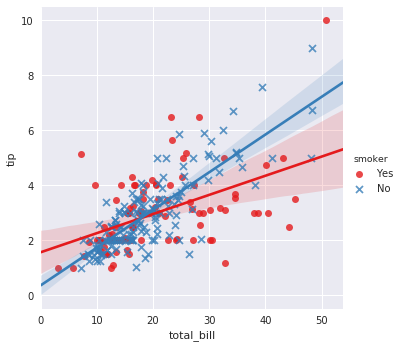

In [131]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=cash,
           markers=["o", "x"], palette="Set1");

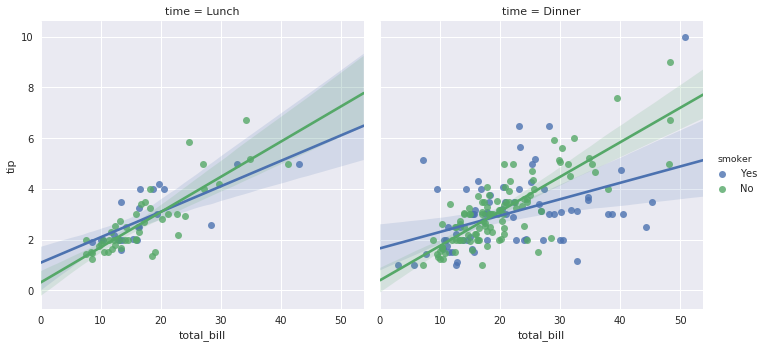

In [132]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=cash);

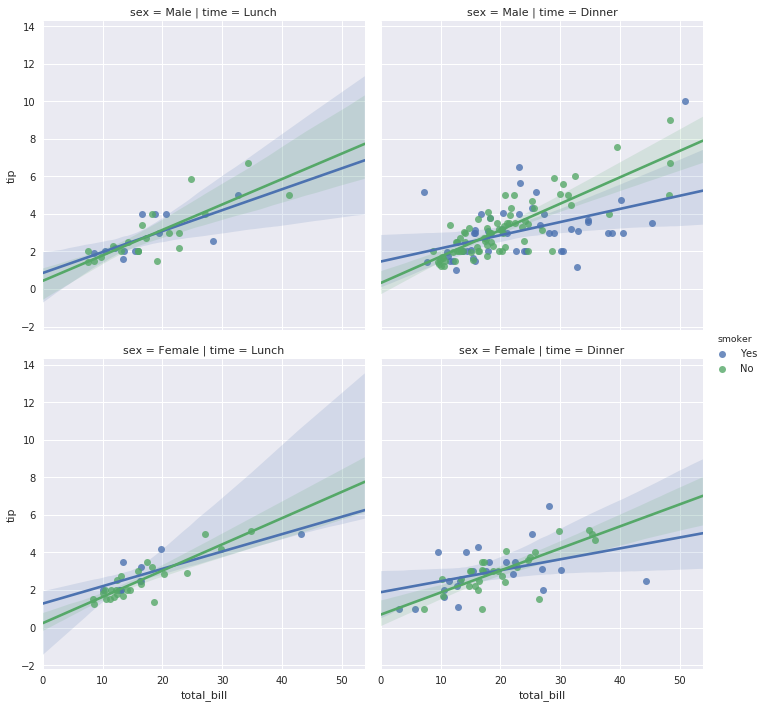

In [133]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=cash);

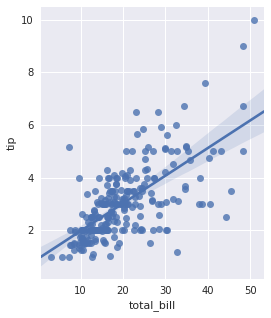

In [134]:
f, ax = plt.subplots(figsize=(4, 5))
sns.regplot(x="total_bill", y="tip", data=cash, ax=ax);

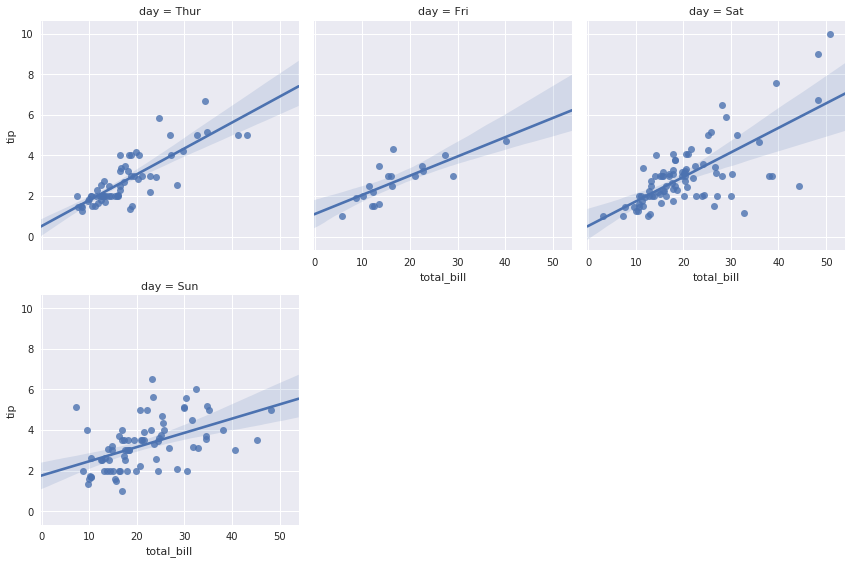

In [135]:
sns.lmplot(x="total_bill", y="tip", col="day", data=cash,
           col_wrap=3, size=4);

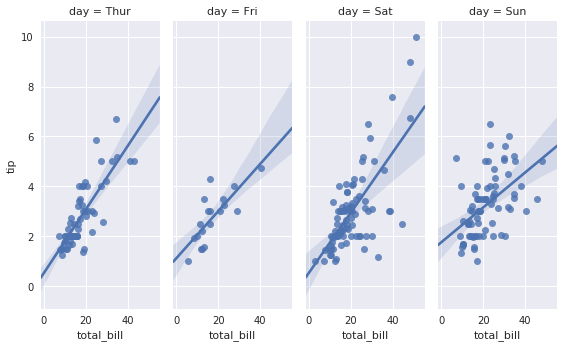

In [136]:
sns.lmplot(x="total_bill", y="tip", col="day", data=cash,
           aspect=.4);

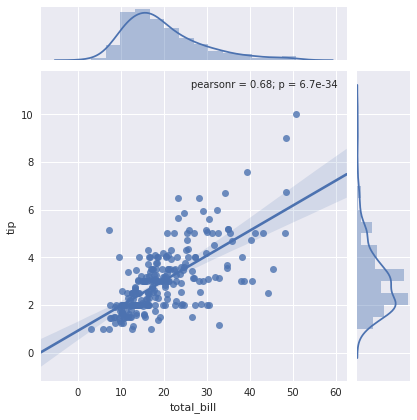

In [137]:
sns.jointplot(x="total_bill", y="tip", data=cash, kind="reg");

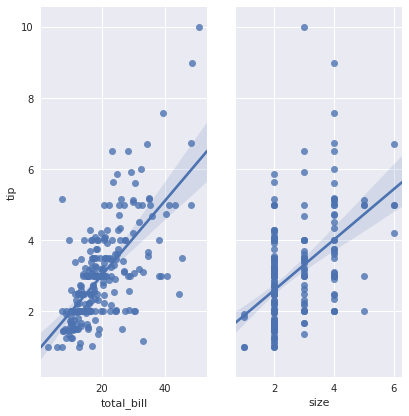

In [138]:
sns.pairplot(cash, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=6, aspect=.5, kind="reg");

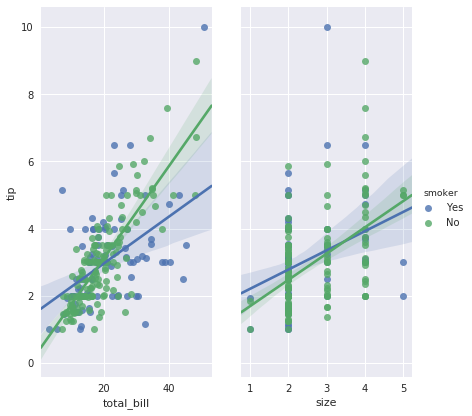

In [139]:
sns.pairplot(cash, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=6, aspect=.5, kind="reg");

In [140]:
%matplotlib inline

In [141]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [142]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [143]:
np.random.seed(sum(map(ord, "categorical")))

In [144]:
titanic = sns.load_dataset("titanic")
cash = sns.load_dataset("tips")
alexa = sns.load_dataset("iris")

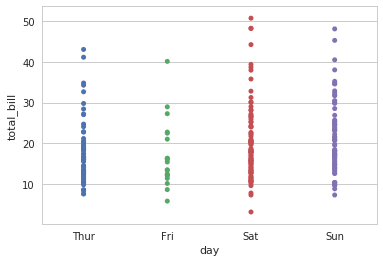

In [145]:
sns.stripplot(x="day", y="total_bill", data=cash);

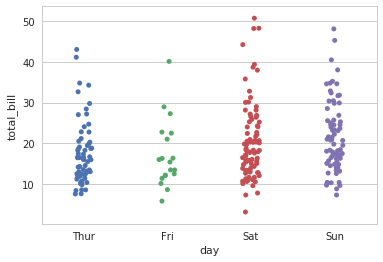

In [146]:
sns.stripplot(x="day", y="total_bill", data=cash, jitter=True);

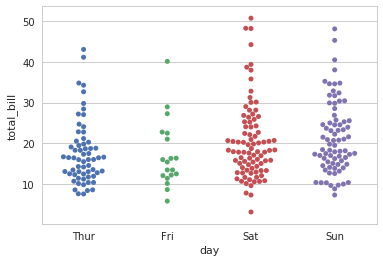

In [147]:
sns.swarmplot(x="day", y="total_bill", data=cash);

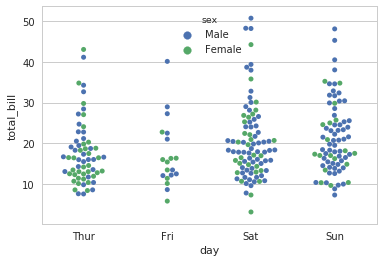

In [148]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=cash);

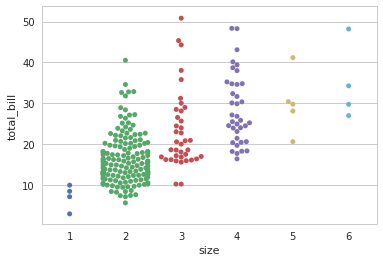

In [149]:
sns.swarmplot(x="size", y="total_bill", data=cash);

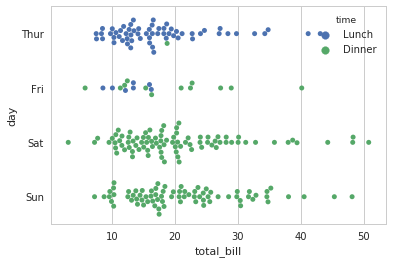

In [150]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=cash);

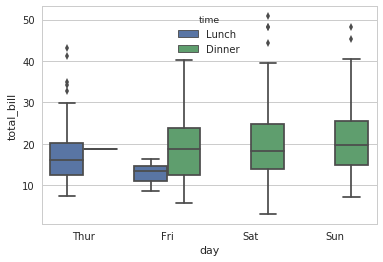

In [151]:
sns.boxplot(x="day", y="total_bill", hue="time", data=cash);

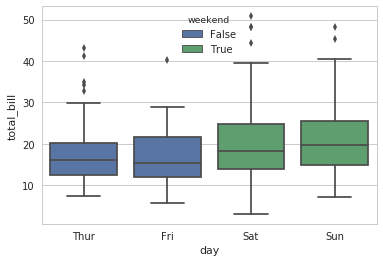

In [152]:
cash["weekend"] = cash["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=cash, dodge=False);

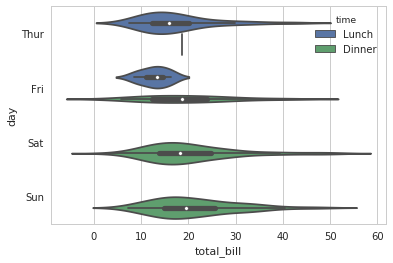

In [153]:
sns.violinplot(x="total_bill", y="day", hue="time", data=cash);

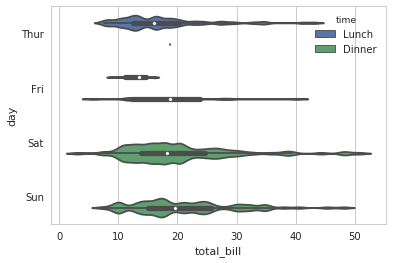

In [154]:
sns.violinplot(x="total_bill", y="day", hue="time", data=cash,
               bw=.1, scale="count", scale_hue=False);

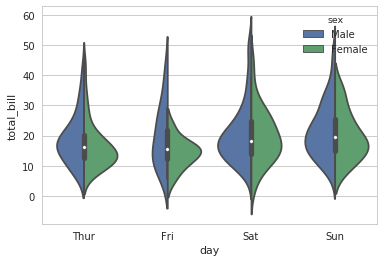

In [155]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=cash, split=True);

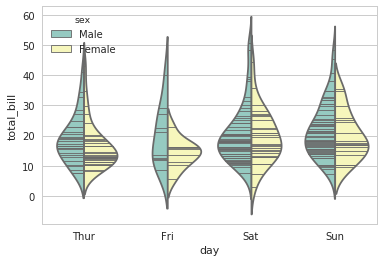

In [156]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=cash,
               split=True, inner="stick", palette="Set3");

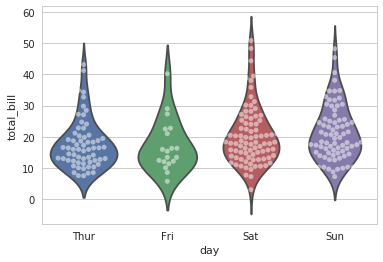

In [157]:
sns.violinplot(x="day", y="total_bill", data=cash, inner=None)
sns.swarmplot(x="day", y="total_bill", data=cash, color="w", alpha=.5);

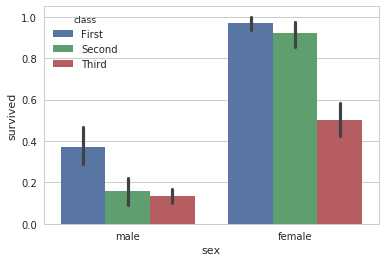

In [160]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

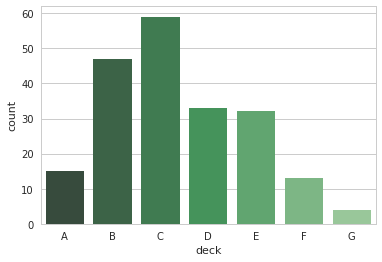

In [161]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

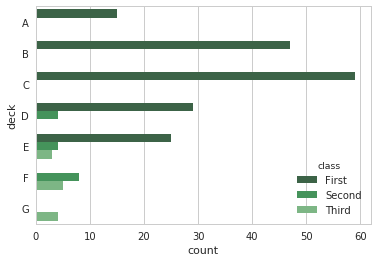

In [162]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

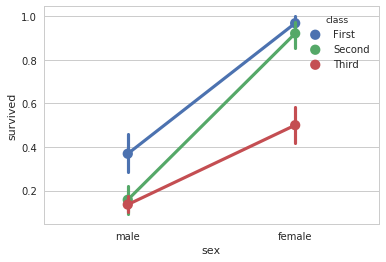

In [163]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

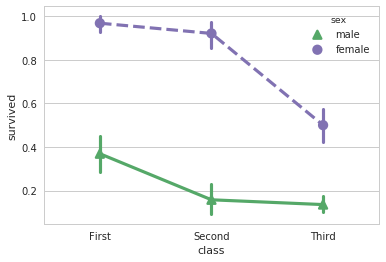

In [164]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

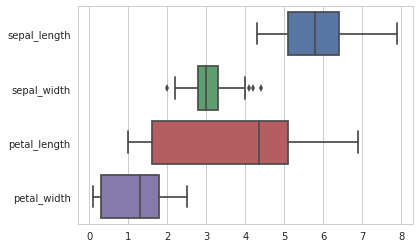

In [165]:
sns.boxplot(data=alexa, orient="h");

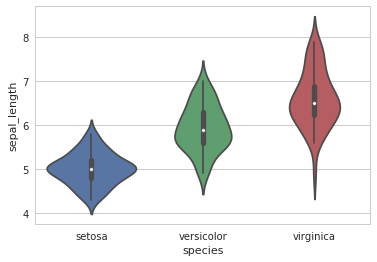

In [166]:
sns.violinplot(x=alexa.species, y=alexa.sepal_length);

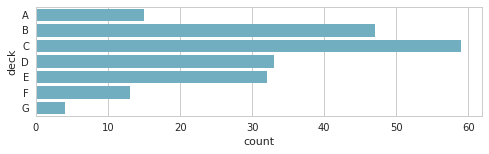

In [167]:
f, ax = plt.subplots(figsize=(8, 2))
sns.countplot(y="deck", data=titanic, color="c");

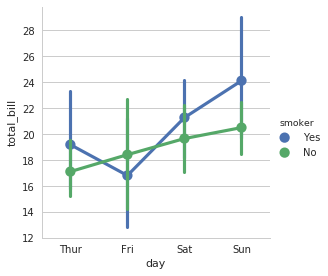

In [168]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=cash);

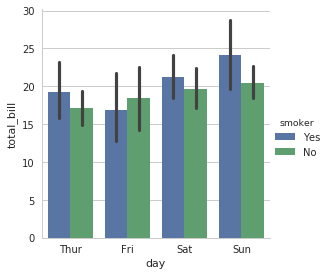

In [169]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=cash, kind="bar");

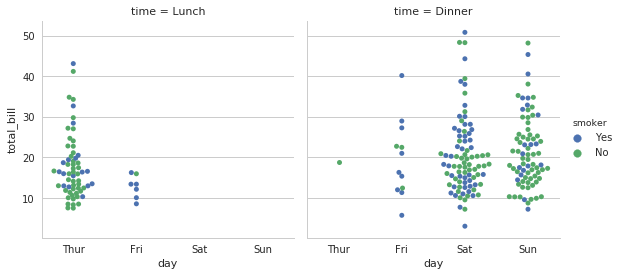

In [170]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=cash, kind="swarm");

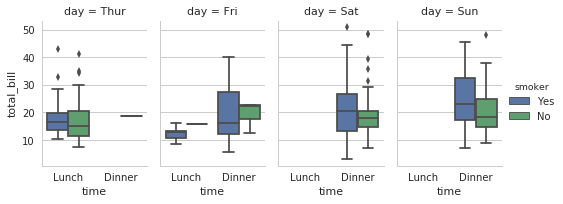

In [171]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=cash, kind="box", size=3, aspect=.6);

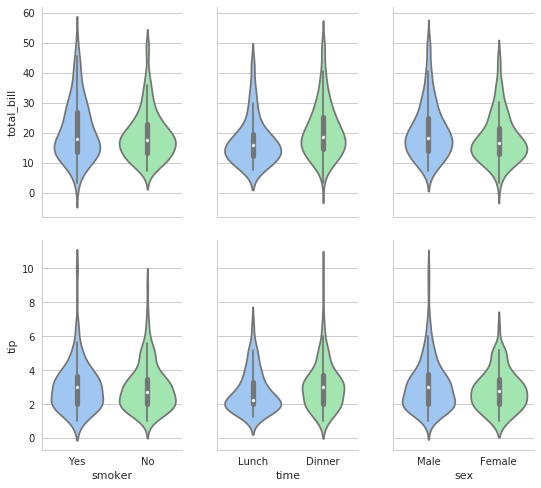

In [173]:
h = sns.PairGrid(cash,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
h.map(sns.violinplot, palette="pastel");